In [32]:
import gpflow
import numpy as np
from src.utils import create_dataset, plot_matrix, plot_matrix_cv
from sklearn.model_selection import KFold
from src.models.kernels import LambdaRBF, ARD_gpflow
from src.models.models import GPRLasso
from src.models.validation import measure_mnll, measure_rmse, kfold_cv_model

## Dataset: Yacht

In [45]:
lasso = 0
dataset = 'yacht'

In [46]:
X_train, Y_train,  X_test, Y_test, Y_train_mean, Y_train_std = create_dataset(dataset, 0)
D = X_train.shape[1]

name,class,transform,prior,trainable,shape,dtype,value
GPRLasso.kernel.L,Parameter,Identity,,True,"(21,)",float64,"[0.40825, 0., 0...."
GPRLasso.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
GPRLasso.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0


RMSE: Train=0.010 Test=0.020
MNLL: Train=-0.330 Test=0.725


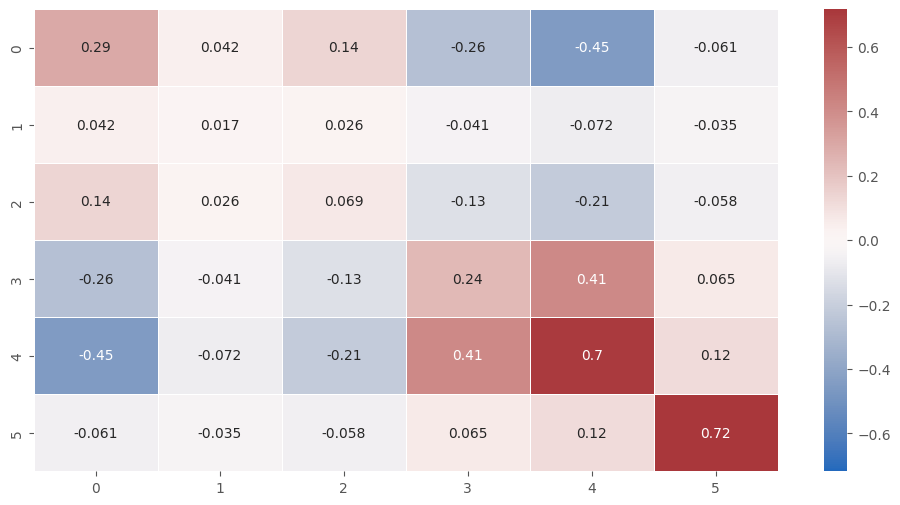

In [47]:
LRBF = LambdaRBF(variance=1.0, randomized=False, d=D)
gpr_lasso_LRBF = GPRLasso(data=(X_train, Y_train), kernel=LRBF, lasso=lasso)
gpflow.utilities.print_summary(gpr_lasso_LRBF, fmt="notebook")
gpr_lasso_LRBF.train()
plot_matrix(gpr_lasso_LRBF.kernel.precision())
train_rmse_stan, test_rmse_stan = measure_rmse(gpr_lasso_LRBF, X_train, Y_train, X_test, Y_test)
train_mnll, test_mnll = measure_mnll(gpr_lasso_LRBF, X_train, Y_train, Y_train_std, X_test, Y_test)
print('RMSE: Train=%.3f Test=%.3f'%(train_rmse_stan, test_rmse_stan))
print('MNLL: Train=%.3f Test=%.3f'%(train_mnll, test_mnll))

name,class,transform,prior,trainable,shape,dtype,value
GPRLasso.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
GPRLasso.kernel.lengthscales,Parameter,Softplus,,True,"(6,)",float64,"[2.44949, 2.44949, 2.44949..."
GPRLasso.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0


RMSE: Train=0.000 Test=0.039
MNLL: Train=-3.219 Test=1.872


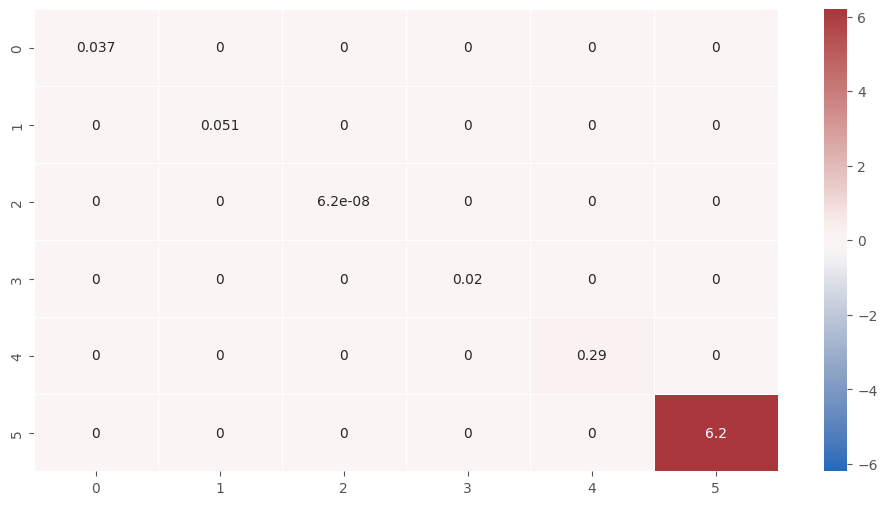

In [48]:
RBF_ARD = ARD_gpflow(variance=1.0, randomized=False, d=D)
gpr_lasso_RBF_ARD = GPRLasso(data=(X_train, Y_train), kernel=RBF_ARD, lasso=lasso)
gpflow.utilities.print_summary(gpr_lasso_RBF_ARD, fmt="notebook")
gpr_lasso_RBF_ARD.train()
plot_matrix(gpr_lasso_RBF_ARD.kernel.precision())
train_rmse_stan, test_rmse_stan = measure_rmse(gpr_lasso_RBF_ARD, X_train, Y_train, X_test, Y_test)
train_mnll, test_mnll = measure_mnll(gpr_lasso_RBF_ARD, X_train, Y_train, Y_train_std, X_test, Y_test)
print('RMSE: Train=%.3f Test=%.3f'%(train_rmse_stan, test_rmse_stan))
print('MNLL: Train=%.3f Test=%.3f'%(train_mnll, test_mnll))

In [37]:
X, Y = create_dataset(dataset, 0, False)
kfolds = KFold(n_splits = 8, shuffle=True, random_state=0)

In [38]:
model_params = {'num_inducing': 100, 'likelihood': gpflow.likelihoods.Gaussian(), 'max_iter': 10000, 'minibatch_size': 1000, 'lasso': lasso, 'tol_sparsity': 0.1}
results_GPR_LRBF = kfold_cv_model(model='GPR-Lasso', X=X, Y=Y, kernel='LRBF', k_folds=kfolds, model_params=model_params, iprint=True)

-- Model: GPR-Lasso; Kernel: LRBF; --
Average test RMSE: 0.034
Average test MNLL: 2.568



In [39]:
model_params = {'num_inducing': 100, 'likelihood': gpflow.likelihoods.Gaussian(), 'max_iter': 10000, 'minibatch_size': 1000, 'lasso': lasso, 'tol_sparsity': 0.1}
results_GPR_LRBF = kfold_cv_model(model='GPR-Lasso', X=X, Y=Y, kernel='RBF-ARD', k_folds=kfolds, model_params=model_params, iprint=True)

-- Model: GPR-Lasso; Kernel: RBF-ARD; --


2023-04-14 10:14:52.950885: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.


Average test RMSE: 0.035
Average test MNLL: 2.090



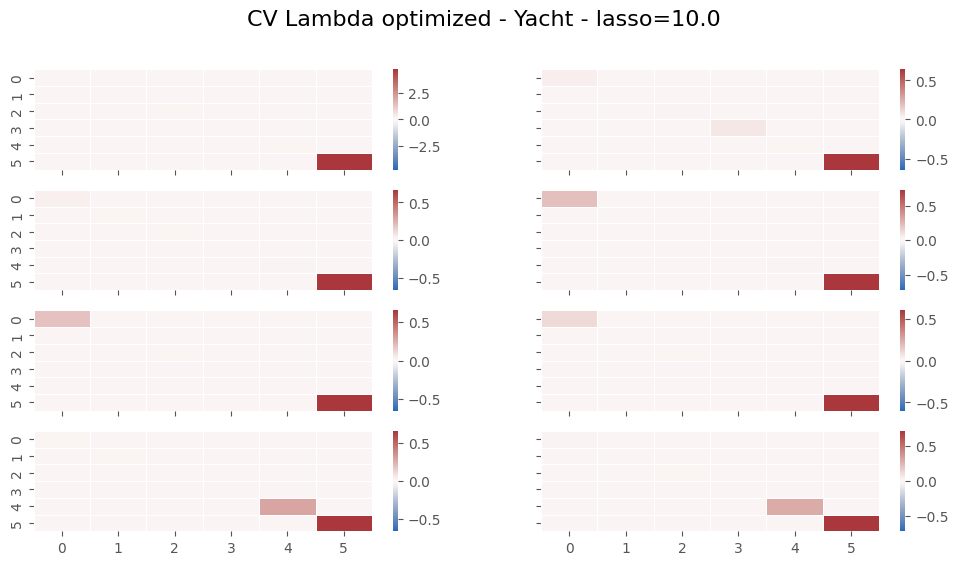

In [40]:
plot_matrix_cv(results_GPR_LRBF['Lambda'], info={'dataset':'Yacht', 'lasso':model_params['lasso']})

name,class,transform,prior,trainable,shape,dtype,value
GPRLasso.kernel.L,Parameter,Identity,,True,"(21,)",float64,"[0.40825, 0., 0...."
GPRLasso.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
GPRLasso.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0


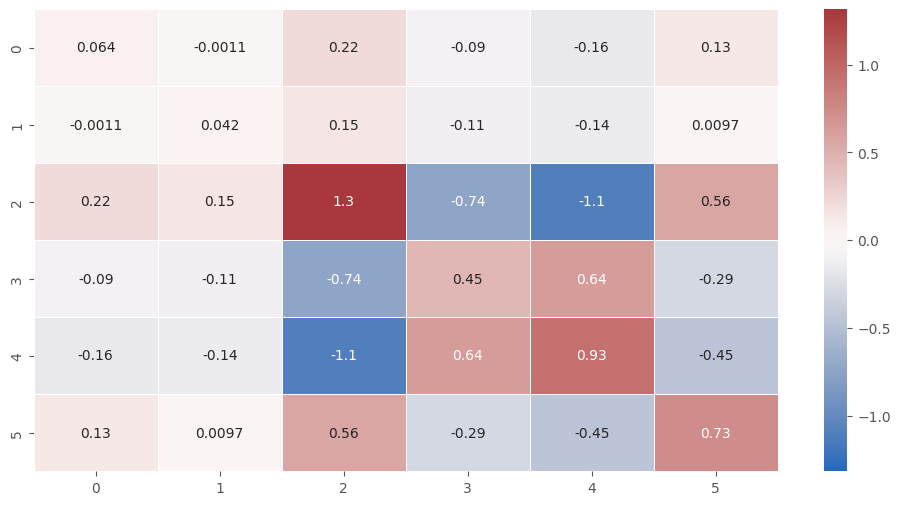

In [43]:
LRBF = LambdaRBF(variance=1.0, randomized=False, d=D)
gpr_lasso_LRBF = GPRLasso(data=(X, Y), kernel=LRBF, lasso=0)
gpflow.utilities.print_summary(gpr_lasso_LRBF, fmt="notebook")
gpr_lasso_LRBF.train()
plot_matrix(gpr_lasso_LRBF.kernel.precision())

name,class,transform,prior,trainable,shape,dtype,value
GPRLasso.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
GPRLasso.kernel.lengthscales,Parameter,Softplus,,True,"(6,)",float64,"[2.44949, 2.44949, 2.44949..."
GPRLasso.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0


2023-04-14 10:32:26.672078: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.


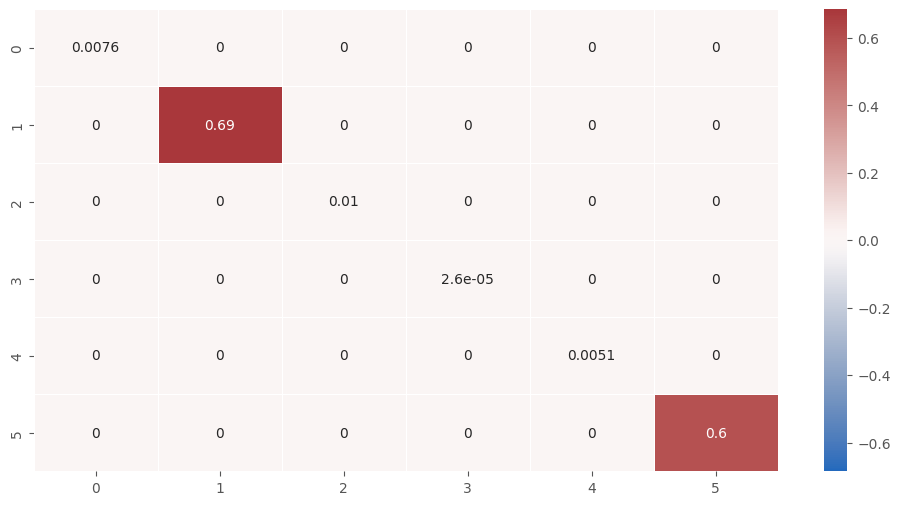

In [44]:
RBF_ARD = ARD_gpflow(variance=1.0, randomized=False, d=D)
gpr_lasso_RBF_ARD = GPRLasso(data=(X, Y), kernel=RBF_ARD, lasso=0)
gpflow.utilities.print_summary(gpr_lasso_RBF_ARD, fmt="notebook")
gpr_lasso_RBF_ARD.train()
plot_matrix(gpr_lasso_RBF_ARD.kernel.precision())